<a href="https://colab.research.google.com/github/MuhammadMuzammil67/House_Prediction_Project/blob/main/HousePrice_LR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 1. reading the data from excel
dataset = pd.read_excel('/content/drive/MyDrive/HousePricePrediction.xlsx')
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


#**2. Data Preprocessing**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
dataset.shape

(2919, 13)

In [ ]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [3]:
#now Handling the missing values of SalePrice Column with mean values of SalePrice.
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


In [4]:
#removing some other null values as they are very low.
df = dataset.dropna()

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [5]:
#detecting outliers in dataset.
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]


In [6]:
# now removing the outliers from dataset
clean_data = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

In [7]:
clean_data.shape

(2078, 13)

In [ ]:
clean_data.head(20)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
12,12,20,RL,12968,Inside,1Fam,6,1962,1962,HdBoard,0.0,912.0,144000.0
14,14,20,RL,10920,Corner,1Fam,5,1960,1960,MetalSd,0.0,1253.0,157000.0
16,16,20,RL,11241,CulDSac,1Fam,7,1970,1970,Wd Sdng,0.0,1004.0,149000.0
18,18,20,RL,13695,Inside,1Fam,5,2004,2004,VinylSd,0.0,1114.0,159000.0
19,19,20,RL,7560,Inside,1Fam,6,1958,1965,BrkFace,0.0,1029.0,139000.0
21,21,45,RM,7449,Inside,1Fam,7,1930,1950,Wd Sdng,0.0,637.0,139400.0


##**3. ED - Analysis with Scatter Plots**

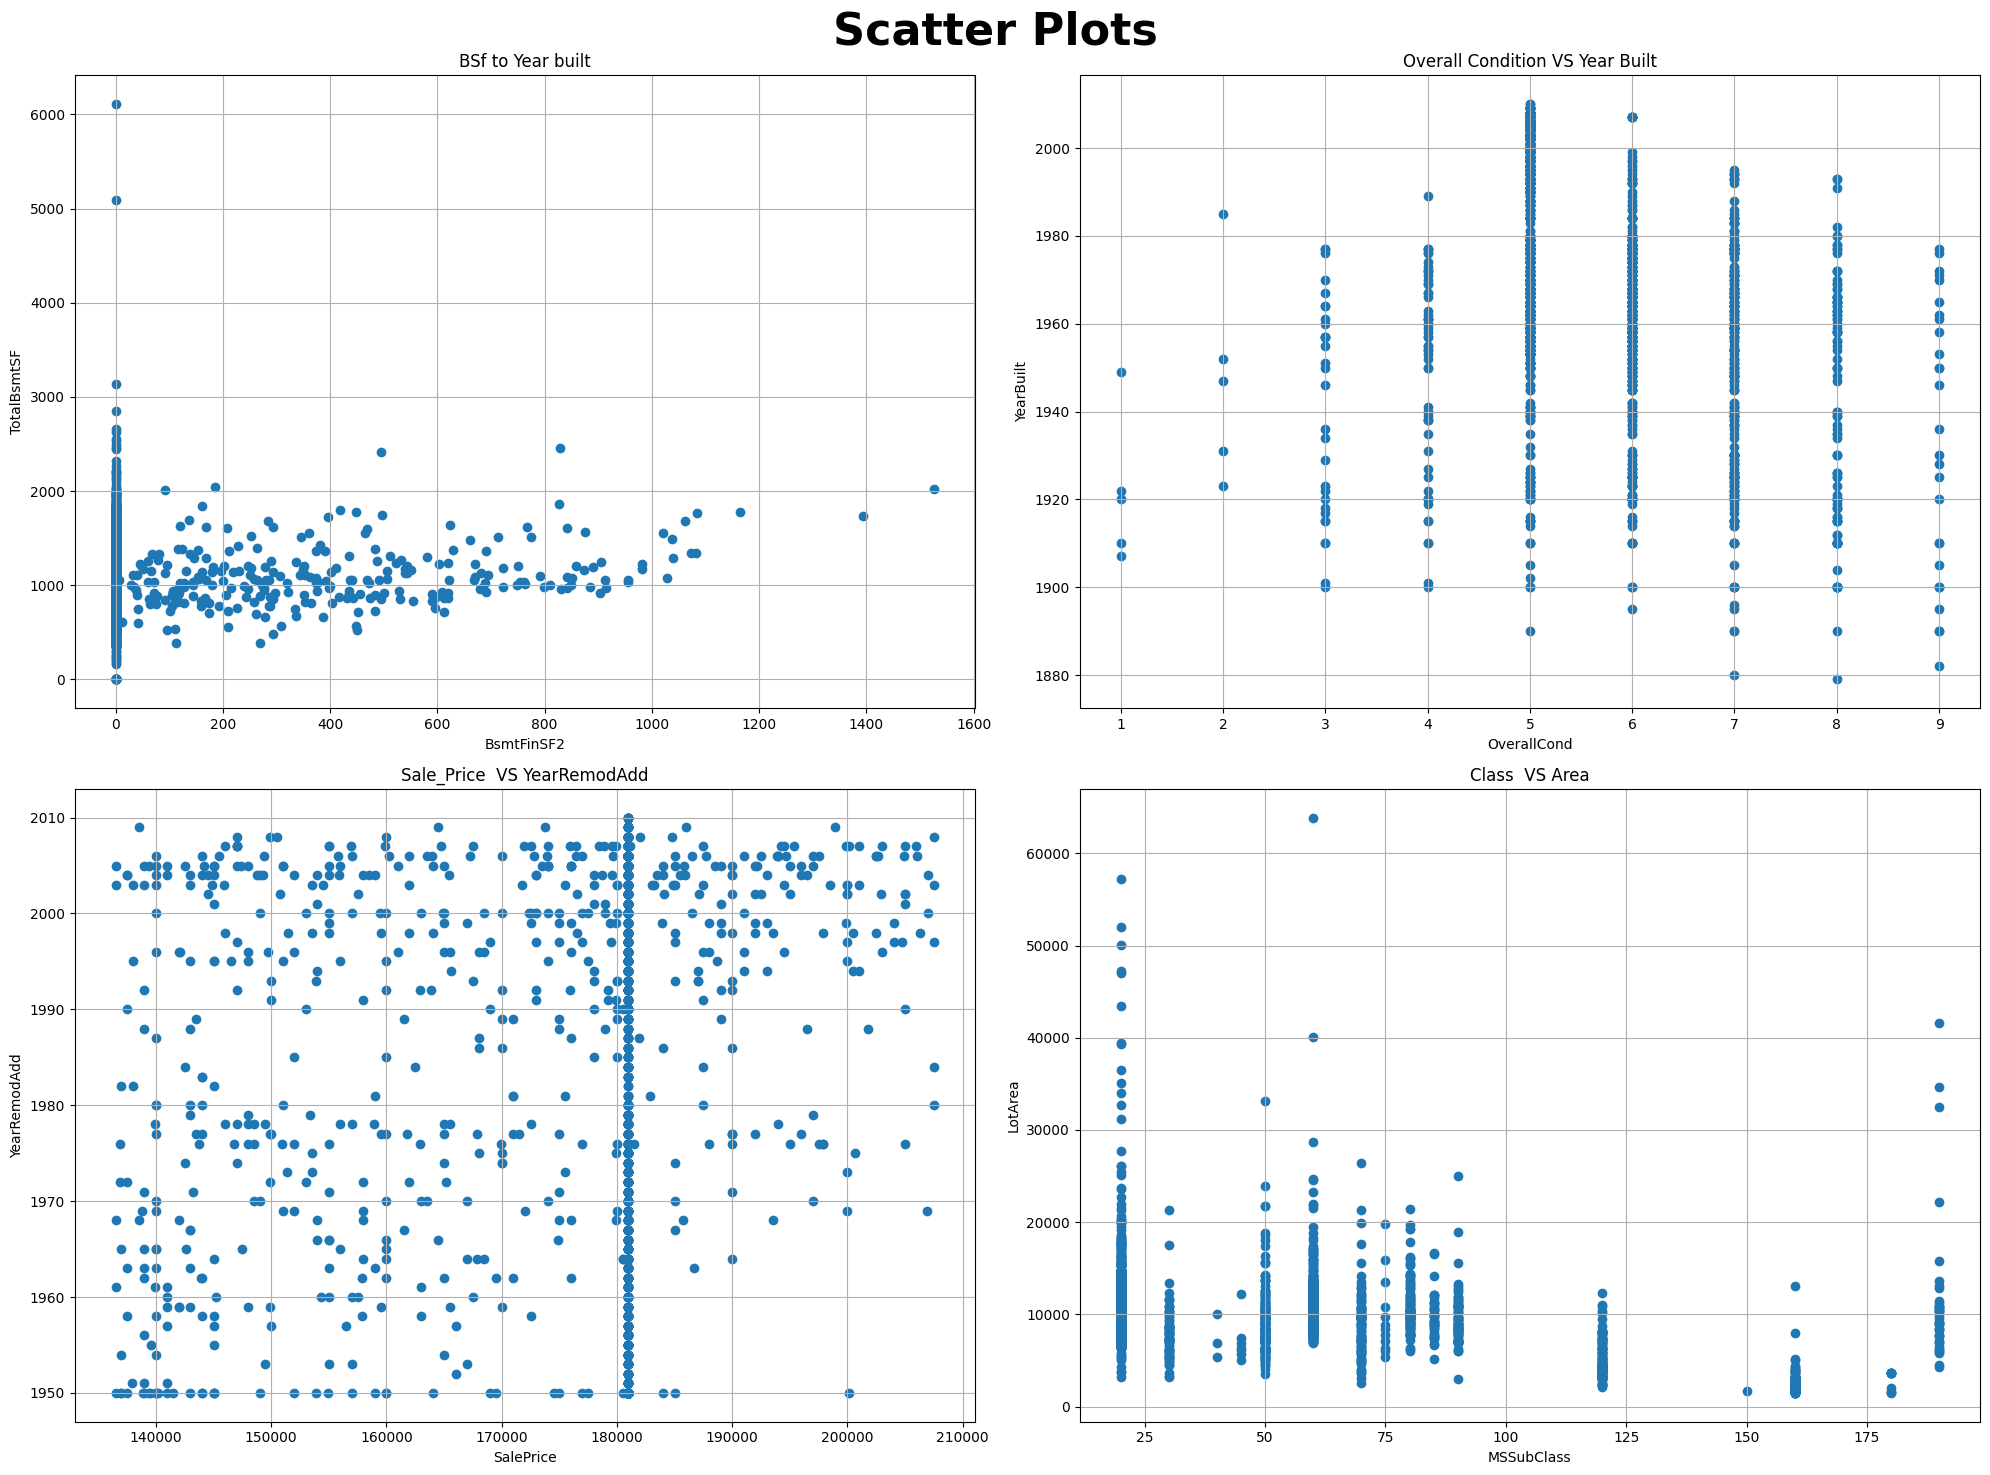

In [8]:
#BsmtFinSF2: Type 2 finished square feet VS TotalBsmtSF: Total square feet of basement area
fig, ((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
scatter_graph = sb1.scatter(x=clean_data['BsmtFinSF2'],
                           y = clean_data['TotalBsmtSF'],
                           )
#scatter plot 1
sb1.set(title="BSf to Year built", xlabel='BsmtFinSF2', ylabel='TotalBsmtSF')
sb1.grid(True)
#===========================================================================
#OverallCond: Overall condition rating VS YearBuilt: Original construction date
bar_graph = sb2.scatter(x=clean_data['OverallCond'],
                    y = clean_data['YearBuilt'],
                    )
sb2.set(title="Overall Condition VS Year Built", xlabel='OverallCond', ylabel='YearBuilt')
sb2.grid(True)
#===========================================================================
#SalePrice VS YearRemodAdd: Remodel date
scatter_graph3 = sb3.scatter(x=clean_data['SalePrice'],
                    y = clean_data['YearRemodAdd'],
                    )
sb3.set(title="Sale_Price  VS YearRemodAdd", xlabel='SalePrice', ylabel='YearRemodAdd')
sb3.grid(True)

#===========================================================================
#MSSubClass: The building class VS LotArea: Lot size in square feet
scatter_graph4 = sb4.scatter(x=clean_data['MSSubClass'],
                    y = clean_data['LotArea'],
                    )
sb4.set(title="Class  VS Area", xlabel='MSSubClass', ylabel='LotArea')
sb4.grid(True)

fig.suptitle('Scatter Plots', fontsize=32, fontweight='bold')
fig.savefig('scatter_plots.png')
plt.tight_layout()

plt.show()



In [9]:
# 4. OneHotEncoder - For Label categorical features
from sklearn.preprocessing import OneHotEncoder

In [10]:
s = (clean_data.dtypes == 'object')
s # getting categorical datatype columns

,0
Id,False
MSSubClass,False
MSZoning,True
LotArea,False
LotConfig,True
BldgType,True
OverallCond,False
YearBuilt,False
YearRemodAdd,False
Exterior1st,True


In [11]:
object_cols = list(s[s].index)
object_cols # converting categorical datatype columns into list.

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [12]:
#Now applying OH-Encoding.
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(clean_data[object_cols]))
OH_cols.index = clean_data.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = clean_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [13]:
df_final.head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5,50,14115,5,1993,1995,0.0,796.0,143000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,60,10382,6,1973,1973,32.0,1107.0,200000.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,12,20,12968,6,1962,1962,0.0,912.0,144000.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##**5. Model Training**

In [14]:
#Splitting Dataset into Training and Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [15]:
# assigning X and Y
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [16]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##**6. Applying Algorithms for Model Training and Accuracy**

###WE will Apply 3 different Algorithms.

1. Linear Regression
2. SVM
3. Random Forest Regressor

For Meausring Accuracy we use **Mean Absolute Error**



In [18]:
#Applying Linear Regression.
from sklearn.linear_model import LinearRegression

In [19]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred = model_LR.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
#Checking the Accuracy through Mean Absoulte Error (MAE)
print(mean_absolute_percentage_error(y_test, Y_pred))

0.045682759101475075


##SVM Applying

In [22]:
#applying svm on data.
from sklearn import svm
from sklearn.svm import SVC

In [23]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred))

0.04374931615778922


##Random Forest Regressor

In [24]:
#applying random forest algo
from sklearn.ensemble import RandomForestRegressor

In [25]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, Y_pred)

0.024213848957229077